<a href="https://colab.research.google.com/github/nJiyeon/ComputerVision/blob/main/Assignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
up = files.upload()

Saving digits.png to digits (1).png


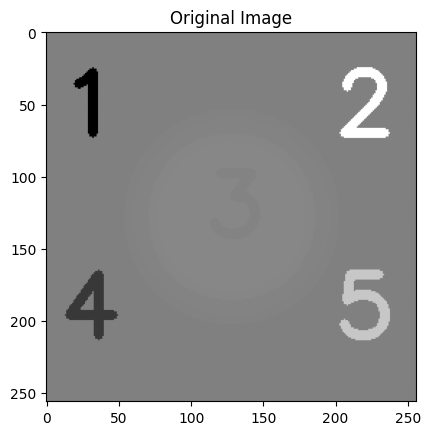

In [14]:
import cv2
from google.colab import files
from matplotlib import pyplot as plt

image = cv2.imread("digits.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("이미지를 불러오는 데 실패했습니다. 파일 이름과 경로를 확인하세요.")
else:
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.show()

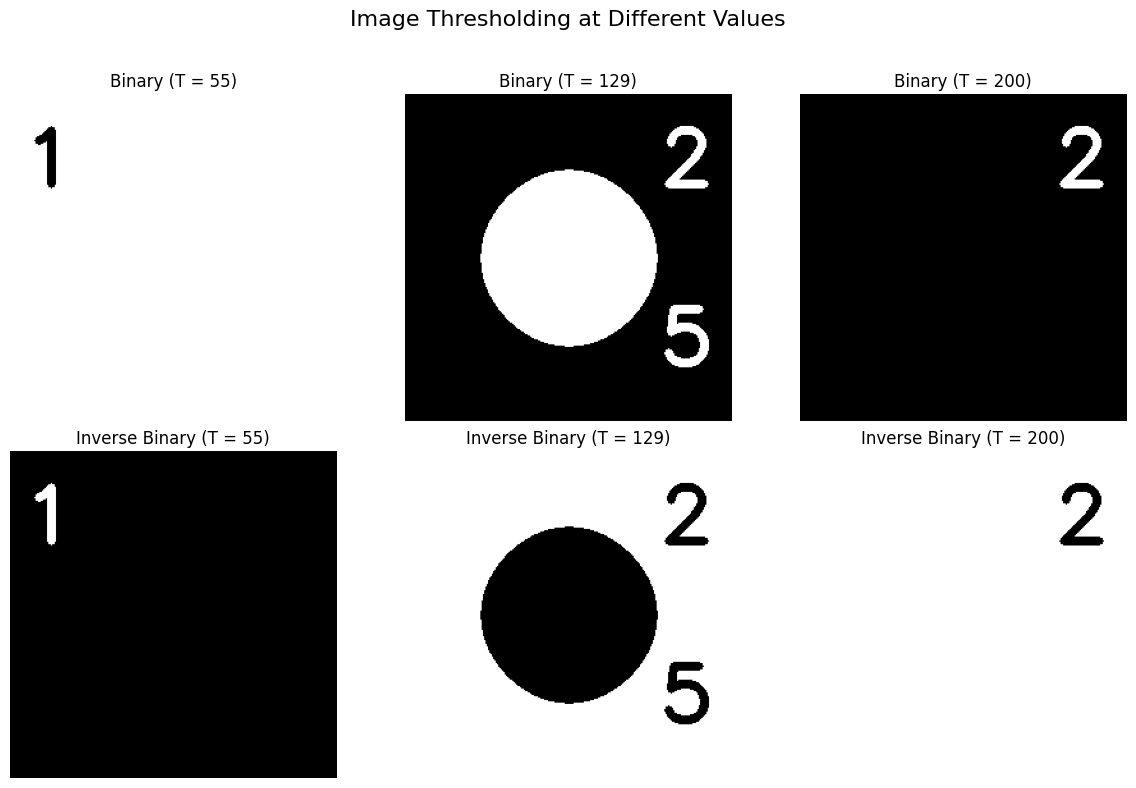

In [17]:
import cv2
import matplotlib.pyplot as plt

# 이미지 로드
image_path = 'digits.png'
gray_image = cv2.imread(image_path)

if gray_image is None:
    print(f"오류: 파일을 찾을 수 없습니다.")
else:
    # 2. 스레시홀딩에 사용할 임계값들을 정의합니다.
    thresholds = [55, 129, 200]

    # 3.2x3 서브플롯 생성
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle('Image Thresholding at Different Values', fontsize=16)

    # 4. 각 임계값에 대해 반복 작업 수행
    for i, T in enumerate(thresholds):
        # 기본 이진 스레시홀딩 (cv2.THRESH_BINARY)
        # 픽셀값이 T보다 크면 255(흰색), 아니면 0(검은색)으로 설정합니다.
        ret_binary, thresh_binary = cv2.threshold(gray_image, T, 255, cv2.THRESH_BINARY)

        # 반전 이진 스레시홀딩 (cv2.THRESH_BINARY_INV)
        # 픽셀값이 T보다 크면 0(검은색), 아니면 255(흰색)으로 설정합니다.
        ret_inverse, thresh_inverse = cv2.threshold(gray_image, T, 255, cv2.THRESH_BINARY_INV)

        # 5. 결과 이미지 시각화
        # 첫 번째 행: 기본 이진 스레시홀딩 결과
        axes[0, i].imshow(thresh_binary, cmap='gray')
        axes[0, i].set_title(f'Binary (T = {T})')
        axes[0, i].axis('off') # 축 숨기기

        # 반전 이진 스레시홀딩 결과 시각화
        axes[1, i].imshow(thresh_inverse, cmap='gray')
        axes[1, i].set_title(f'Inverse Binary (T = {T})')
        axes[1, i].axis('off') # 축 숨기기

    # 레이아웃을 조정하고 플롯을 화면에 표시합니다.
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

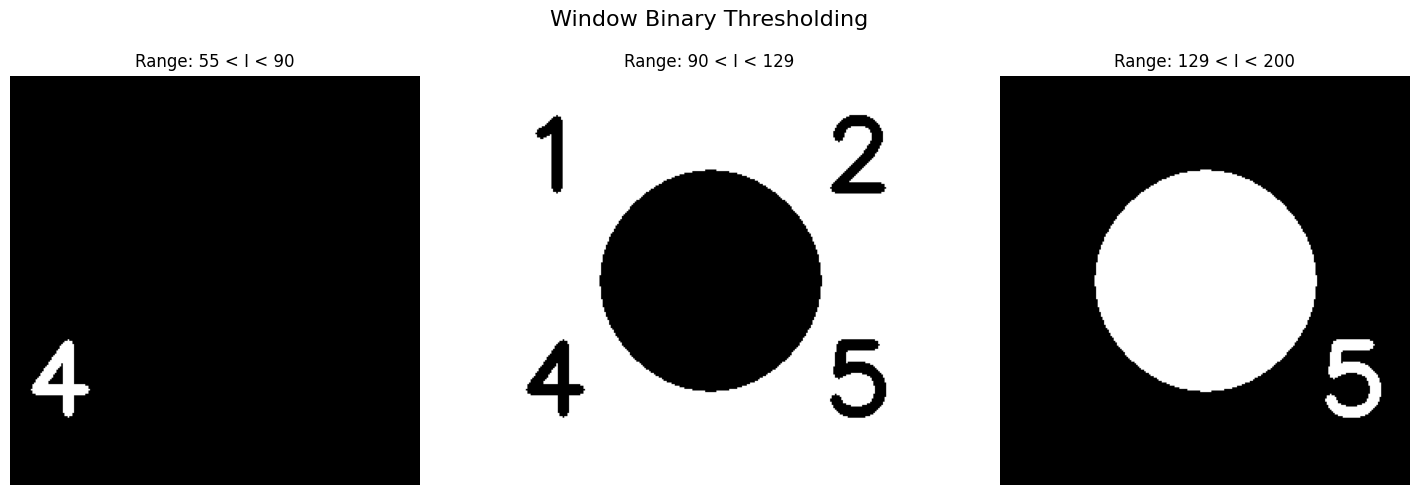

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 로드
image_path = 'digits.png'
gray_image = cv2.imread(image_path)

# 이미지를 성공적으로 로드했는지 확인합니다.
if gray_image is None:
    print(f"오류: '{image_path}' 파일을 찾을 수 없거나 열 수 없습니다.")
else:
    # 2. 사용할 윈도우(범위) 임계값들을 정의합니다.
    threshold_ranges = [
        (55, 90),
        (90, 129),
        (129, 200)
    ]

    # 3. 1x3 서브플롯을 생성합니다.
    fig, axes = plt.subplots(1, len(threshold_ranges), figsize=(15, 5))
    fig.suptitle('Window Binary Thresholding', fontsize=16)

    for i, (T1, T2) in enumerate(threshold_ranges):
        # 방법 1: OpenCV 함수를 두 번 사용
        # T1보다 큰 값에 대한 마스크 (I > T1)
        _, lower_mask = cv2.threshold(gray_image, T1, 255, cv2.THRESH_BINARY)
        # T2보다 작은 값에 대한 마스크 (I < T2)
        _, upper_mask = cv2.threshold(gray_image, T2, 255, cv2.THRESH_BINARY_INV)
        # 두 마스크를 AND 연산하여 범위 내의 픽셀만 추출
        window_output = cv2.bitwise_and(lower_mask, upper_mask)

        # 5. 결과 이미지를 서브플롯에 시각화
        axes[i].imshow(window_output, cmap='gray')
        axes[i].set_title(f'Range: {T1} < I < {T2}')
        axes[i].axis('off') # 축 숨기기

    # 레이아웃을 조정하고 플롯을 화면에 표시
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

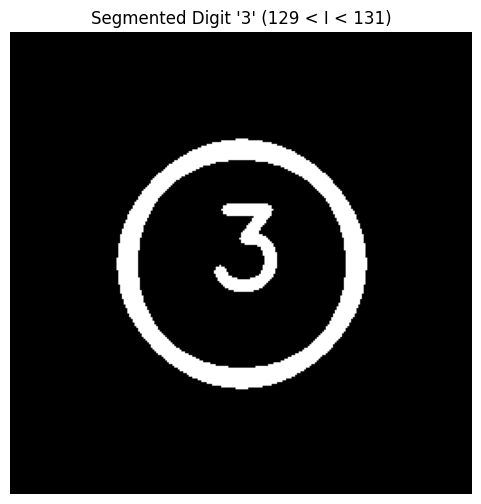

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1. 이미지 로드
image_path = 'digits.png'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if gray_image is None:
    print(f"오류: '{image_path}' 파일을 찾을 수 없습니다.")
else:
    # 2. 숫자 '3'을 분리하기 위한 최적의 임계값 범위 설정
    T1 = 129
    T2 = 131

    # 3. 윈도우 스레시홀딩을 적용합니다.
    # T1보다 큰 값에 대한 마스크 (I > 90)
    _, lower_mask = cv2.threshold(gray_image, T1, 255, cv2.THRESH_BINARY)
    # T2보다 작은 값에 대한 마스크 (I < 129)
    _, upper_mask = cv2.threshold(gray_image, T2, 255, cv2.THRESH_BINARY_INV)
    # 두 마스크를 AND 연산하여 90 < I < 129 범위의 픽셀만 추출합니다.
    segmented_digit_3 = cv2.bitwise_and(lower_mask, upper_mask)

    # 시각화
    plt.figure(figsize=(6, 6))
    plt.imshow(segmented_digit_3, cmap='gray')
    plt.title(f"Segmented Digit '3' ({T1} < I < {T2})")
    plt.axis('off') # 축 숨기기
    plt.show()